In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plscan import PLSCAN

In [2]:
min_samples = 5
min_cluster_size = min_samples
mst = np.load("mst.npy")
data = np.load("data.npy")

# fully disconnect one point that bridges the purple and brown clusters to the
# others.
pt = 2134
remove_idx = np.where((mst[:, 0] == pt) | (mst[:, 1] == pt))[0]
broken_mst = np.delete(mst, remove_idx, axis=0)

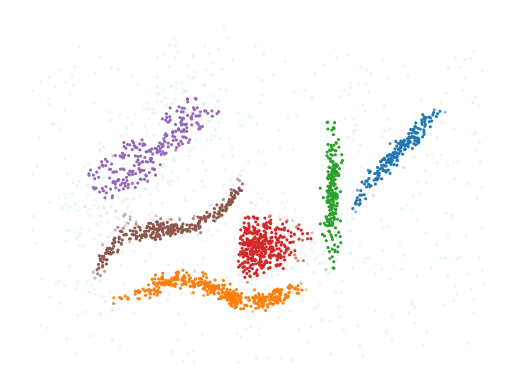

In [3]:
# the input contains k=5 mutual reachability distance!
c = PLSCAN(min_cluster_size=5.0).fit(broken_mst, data.shape[0])
plt.scatter(
    *data.T,
    c=c.labels_ % 10,
    alpha=np.maximum(0.1, c.probabilities_),
    s=5,
    linewidth=0,
    cmap="tab10",
)
plt.axis("off")
plt.show()

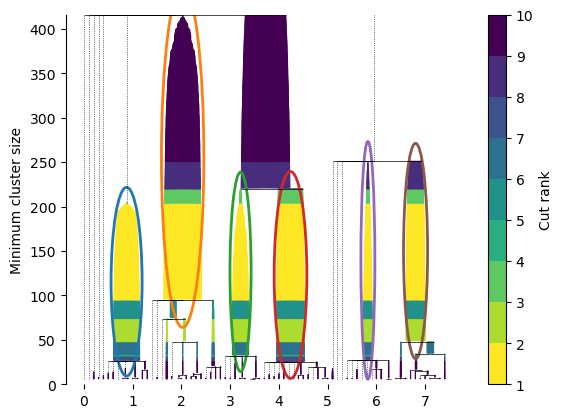

In [4]:
xs = c.leaf_tree_.plot(select_clusters=True)
plt.show()

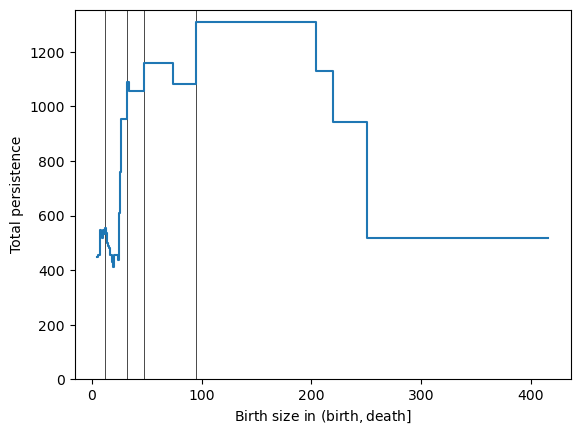

In [5]:
layers, peaks = c.cluster_layers(
    # min_size=16.0, # min cluster size threshold
    # max_size=80,   # max cluster size threshold
    # height=600,    # persistence threshold
    # threshold=25,  # persistence difference between the peak and neighbors
    n_peaks=4,     # keep only the n most persistent peaks after all thresholds
)

c.persistence_trace_.plot()
plt.vlines(list(zip(*layers))[0], *plt.ylim(), color="k", linewidth=0.5, zorder=1)
# plt.xlim([0, 125])
plt.show()

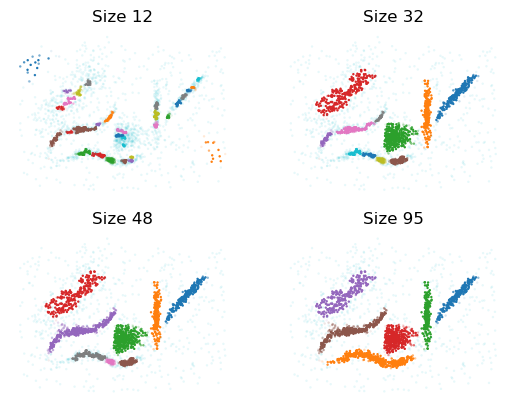

In [6]:
n_rows = int(np.ceil(np.sqrt(len(layers))))
n_cols = n_rows
plt.figure()
for i, (size, labels, probs) in enumerate(layers):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.scatter(
        *data.T,
        c=labels % 10,
        alpha=np.maximum(0.1, probs),
        s=3,
        linewidth=0,
        cmap="tab10",
    )
    plt.title(f"Size {int(size)}")
    plt.axis("off")
plt.show()

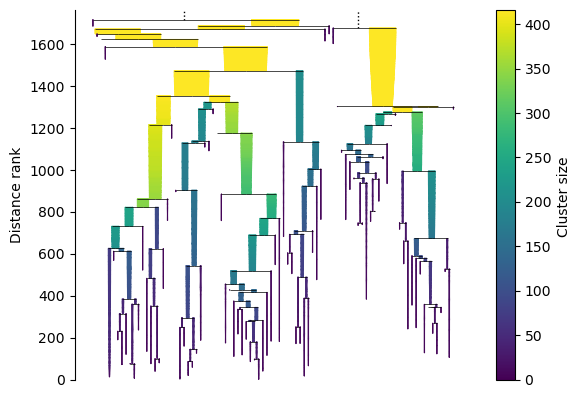

In [7]:
c.condensed_tree_.plot()
plt.show()